   #       Sales Prediction Using Machine Learning

This dataset is of EB Mart Sales of some indian states for the Period of Dec'22.
It gives insights of the South India Region Customers Order Data.
With the help of this Past Data we are going to;
1. Predict the Sales for the Month of dec '23.
2. Statewise - Best Selling Item Types

This would help EB Mart Procurement Team to :
1. Procure goods in advance for the  dec'23 To Mar'23 to avoid stockouts of running items.
2. Run Campaigns.
3. Bundling of Items ItemTYpe (Fast & Slow Moving Combination).


# Step 1 : Reading and Understanding Data

In [1]:
# import  libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression


In [2]:
#load dataset
df = pd.read_excel("EB Mart_Sales Data_ Dec 22.xlsx")
df

,State,City,SalesOrderDate,SalesOrder,SalesPerson,CustomerID,CustomerName,ItemType,ItemCategory,ItemSubcategory,Brand,ItemCode,Qty,NetAmount,GrandTotal
0,Maharashtra,Nanded Waghala,2022-12-01,O2223-01122022-27184,Anirudhha Shorey,C0123456,Dudhanshavali Kirana,FMCG,Biscuit,Biscuit,Britannia,Marie Gold@10-Case72Dozen12-Britannia-Snacks &...,72,556.170000,656.280600
1,Maharashtra,Nanded Waghala,2022-12-01,O2223-01122022-27184,Anirudhha Shorey,C0123456,Dudhanshavali Kirana,FMCG,Bathing Soap,Bathing Soap,Reckitt Benckiser - Health,Dettol Original Soap-4+1@166-Case48-Reckitt Be...,5,664.580150,784.204577
2,Maharashtra,Nanded Waghala,2022-12-01,O2223-01122022-27184,Anirudhha Shorey,C0123456,Dudhanshavali Kirana,FMCG,Bathing Soap,Bathing Soap,HUL,Dove Beauty Soap@10-Case288Dozen12-HUL-Persona...,12,93.408163,110.221632
3,Maharashtra,Nanded Waghala,2022-12-01,O2223-01122022-27184,Anirudhha Shorey,C0123456,Dudhanshavali Kirana,FMCG,Bathing Soap,Bathing Soap,Godrej,Godrej No.1 Sandal Soap-Pack of 4@40-Case54-Go...,5,149.568940,176.491349
4,Maharashtra,Nanded Waghala,2022-12-01,O2223-01122022-27184,Anirudhha Shorey,C0123456,Dudhanshavali Kirana,FMCG,Bathing Soap,Bathing Soap,Wipro,Santoor Orange (Pack of 4)@40-Case90-Wipro-Per...,6,186.126318,219.629055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Karnataka,Challakere,2022-12-02,O2223-02122022-28069,Smarajit Jagarlamudi,C0131295,Basappa Store,FMCG,Biscuit,Biscuit,Britannia,Good day Butter@10-Case72Dozen12-Britannia-Sna...,24,182.055040,214.824947
99996,Karnataka,Challakere,2022-12-02,O2223-02122022-28069,Smarajit Jagarlamudi,C0131295,Basappa Store,FMCG,Biscuit,Biscuit,ITC,Sunfeast Bounce Orange Cream@5-Case144Dozen12-...,12,46.213200,54.531576
99997,Karnataka,Challakere,2022-12-02,O2223-02122022-28069,Smarajit Jagarlamudi,C0131295,Basappa Store,FMCG,ToothPaste,ToothPaste,ColgatePalmolive,Colgate Dental Cream@10-Case288Dozen12-Colgate...,12,86.903000,102.545540
99998,Karnataka,Challakere,2022-12-02,O2223-02122022-28069,Smarajit Jagarlamudi,C0131295,Basappa Store,FMCG,ToothPaste,ToothPaste,ColgatePalmolive,Colgate Dental Cream@20-Case288Packet12-Colgat...,12,184.900000,218.182000


Abstract:
This is a transnational dataset which contains all the transactions occurring between 01/12/2022 and 31/12/2022 for a retail store.

Attribute Information:
State : State.  Nominal
city: city. Nominal
Sales Order Date: Sales Order Date. Numeric,the day when each transaction was generated.
Sales Order  :Sales Order No.  Nominal, a 6-digit integral number uniquely assigned to each transaction. 
Sales Person: Sales Person Name. Nominal
Customer ID : Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
Customer Name: Customer Name. Nominal, a 5-digit integral number uniquely assigned to each customer.
Item Type  
Item Category 
Item Subcategory
Brand 
Item Code 
Qty
Net Amount 
Grand Total 

Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2022 and 31/12/2022 for a retail store.

In [3]:
#find the data type of each feature
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            100000 non-null  object        
 1   City             100000 non-null  object        
 2   SalesOrderDate   100000 non-null  datetime64[ns]
 3   SalesOrder       100000 non-null  object        
 4   SalesPerson      100000 non-null  object        
 5   CustomerID       100000 non-null  object        
 6   CustomerName     100000 non-null  object        
 7   ItemType         100000 non-null  object        
 8   ItemCategory     100000 non-null  object        
 9   ItemSubcategory  100000 non-null  object        
 10  Brand            100000 non-null  object        
 11  ItemCode         100000 non-null  object        
 12  Qty              100000 non-null  int64         
 13  NetAmount        100000 non-null  float64       
 14  GrandTotal       1000

In [4]:
#dataset description
df.describe()

,Qty,NetAmount,GrandTotal
count,100000.000000,100000.000000,100000.000000
mean,28.317470,174.051440,198.609673
std,49.854489,251.816945,280.279851
min,1.000000,0.000000,0.000000
25%,12.000000,64.480000,72.864284
50%,16.000000,94.161959,109.523391
75%,27.000000,184.424890,216.034400
max,1800.000000,14904.300000,15649.515000


In [5]:
## to check the diamension
df.shape

(100000, 15)

# Step 2 : Data Cleaning


In [6]:
#find null values 
df.isnull().sum() 

State              0
City               0
SalesOrderDate     0
SalesOrder         0
SalesPerson        0
CustomerID         0
CustomerName       0
ItemType           0
ItemCategory       0
ItemSubcategory    0
Brand              0
ItemCode           0
Qty                0
NetAmount          0
GrandTotal         0
dtype: int64

In [7]:
## check for duplicates
## if there are any duplicates, dropthem-- df.drop_duplicate
df.duplicated().sum()

3

In [8]:
df.drop_duplicates()

,State,City,SalesOrderDate,SalesOrder,SalesPerson,CustomerID,CustomerName,ItemType,ItemCategory,ItemSubcategory,Brand,ItemCode,Qty,NetAmount,GrandTotal
0,Maharashtra,Nanded Waghala,2022-12-01,O2223-01122022-27184,Anirudhha Shorey,C0123456,Dudhanshavali Kirana,FMCG,Biscuit,Biscuit,Britannia,Marie Gold@10-Case72Dozen12-Britannia-Snacks &...,72,556.170000,656.280600
1,Maharashtra,Nanded Waghala,2022-12-01,O2223-01122022-27184,Anirudhha Shorey,C0123456,Dudhanshavali Kirana,FMCG,Bathing Soap,Bathing Soap,Reckitt Benckiser - Health,Dettol Original Soap-4+1@166-Case48-Reckitt Be...,5,664.580150,784.204577
2,Maharashtra,Nanded Waghala,2022-12-01,O2223-01122022-27184,Anirudhha Shorey,C0123456,Dudhanshavali Kirana,FMCG,Bathing Soap,Bathing Soap,HUL,Dove Beauty Soap@10-Case288Dozen12-HUL-Persona...,12,93.408163,110.221632
3,Maharashtra,Nanded Waghala,2022-12-01,O2223-01122022-27184,Anirudhha Shorey,C0123456,Dudhanshavali Kirana,FMCG,Bathing Soap,Bathing Soap,Godrej,Godrej No.1 Sandal Soap-Pack of 4@40-Case54-Go...,5,149.568940,176.491349
4,Maharashtra,Nanded Waghala,2022-12-01,O2223-01122022-27184,Anirudhha Shorey,C0123456,Dudhanshavali Kirana,FMCG,Bathing Soap,Bathing Soap,Wipro,Santoor Orange (Pack of 4)@40-Case90-Wipro-Per...,6,186.126318,219.629055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Karnataka,Challakere,2022-12-02,O2223-02122022-28069,Smarajit Jagarlamudi,C0131295,Basappa Store,FMCG,Biscuit,Biscuit,Britannia,Good day Butter@10-Case72Dozen12-Britannia-Sna...,24,182.055040,214.824947
99996,Karnataka,Challakere,2022-12-02,O2223-02122022-28069,Smarajit Jagarlamudi,C0131295,Basappa Store,FMCG,Biscuit,Biscuit,ITC,Sunfeast Bounce Orange Cream@5-Case144Dozen12-...,12,46.213200,54.531576
99997,Karnataka,Challakere,2022-12-02,O2223-02122022-28069,Smarajit Jagarlamudi,C0131295,Basappa Store,FMCG,ToothPaste,ToothPaste,ColgatePalmolive,Colgate Dental Cream@10-Case288Dozen12-Colgate...,12,86.903000,102.545540
99998,Karnataka,Challakere,2022-12-02,O2223-02122022-28069,Smarajit Jagarlamudi,C0131295,Basappa Store,FMCG,ToothPaste,ToothPaste,ColgatePalmolive,Colgate Dental Cream@20-Case288Packet12-Colgat...,12,184.900000,218.182000


In [9]:
# droping rows having missing values
df.dropna(axis=0, how='any', inplace = True)

In [10]:
df['WeekDay']=df['SalesOrderDate'].dt.weekday
df['WeekDay'] = df['WeekDay'].replace({0:'Mon', 1:'Tue',2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

In [11]:
# Remove columns
df.drop(['ItemCategory','ItemSubcategory','Brand','ItemCode','City','SalesOrderDate','SalesOrder','SalesPerson','CustomerID','CustomerName','GrandTotal'],inplace=True,axis=1)

In [12]:
#grouping in columns
dfg=df.groupby(['State','ItemType','WeekDay'])['NetAmount','Qty'].sum().reset_index()

In [13]:
#Creating column with Unit Price of every Item.
dfg['avg_UnitPrice'] = dfg['NetAmount']/dfg['Qty']


In [14]:
dfg

,State,ItemType,WeekDay,NetAmount,Qty,avg_UnitPrice
0,Andhra Pradesh,FMCG,Fri,184445.598430,32203,5.727591
1,Andhra Pradesh,FMCG,Mon,75562.829859,10495,7.199889
2,Andhra Pradesh,FMCG,Sat,71064.563980,11301,6.288343
3,Andhra Pradesh,FMCG,Thur,180633.420052,30234,5.974513
4,Andhra Pradesh,FMCG,Tue,147372.533542,29202,5.046659
...,...,...,...,...,...,...
97,Telangana,Sugar,Mon,14079.948280,8,1759.993535
98,Telangana,Sugar,Sat,12605.244755,7,1800.749251
99,Telangana,Sugar,Thur,7304.308001,4,1826.077000
100,Telangana,Sugar,Tue,22910.678029,13,1762.359848


In [15]:
# to check columns
dfg.columns

Index(['State', 'ItemType', 'WeekDay', 'NetAmount', 'Qty', 'avg_UnitPrice'], dtype='object')

In [16]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          102 non-null    object 
 1   ItemType       102 non-null    object 
 2   WeekDay        102 non-null    object 
 3   NetAmount      102 non-null    float64
 4   Qty            102 non-null    int64  
 5   avg_UnitPrice  102 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.9+ KB


In [17]:
dfg.describe()

,NetAmount,Qty,avg_UnitPrice
count,1.020000e+02,102.000000,102.000000
mean,1.706387e+05,27762.225490,602.310725
std,2.787434e+05,46278.824603,784.902456
min,4.470000e+02,1.000000,4.172952
25%,1.086094e+04,17.000000,5.576979
50%,4.582111e+04,127.500000,130.658536
75%,2.606126e+05,47444.750000,1548.403247
max,1.344703e+06,216797.000000,1996.017860


In [18]:
## to check the diamension
dfg.shape

(102, 6)

#   Step 3 : Visualize dataset

## > Statewise sales volume 

In [19]:
dfg['State'].value_counts()

Karnataka         18
Bihar             17
Jharkhand         17
Maharashtra       14
Andhra Pradesh    12
Madhya Pradesh    12
Telangana         12
Name: State, dtype: int64

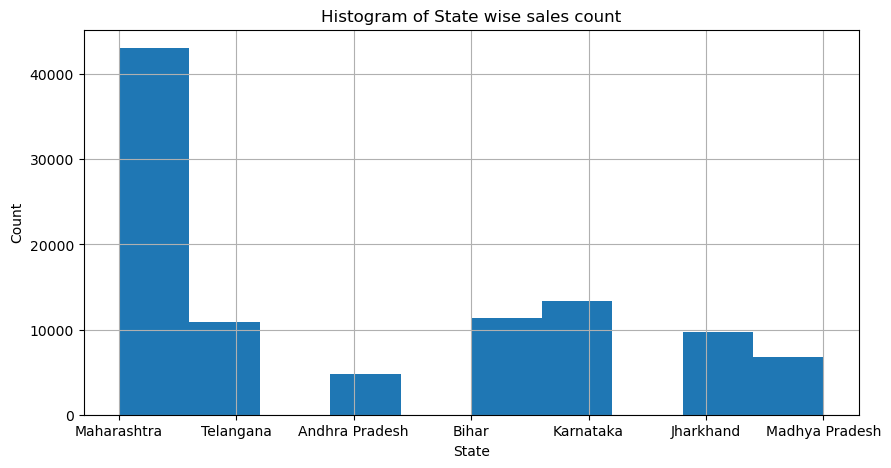

In [20]:
#States count
plt.figure(figsize = (10, 5) )
plt.hist(df['State'])
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Histogram of State wise sales count")
plt.grid(True)
plt.show()

>Most of the customers belong to State 'Maharashtra'

## ItemType wise sales volume

In [21]:
dfg['ItemType'].value_counts()

FMCG       43
Oil        30
Sugar      28
Tobacco     1
Name: ItemType, dtype: int64

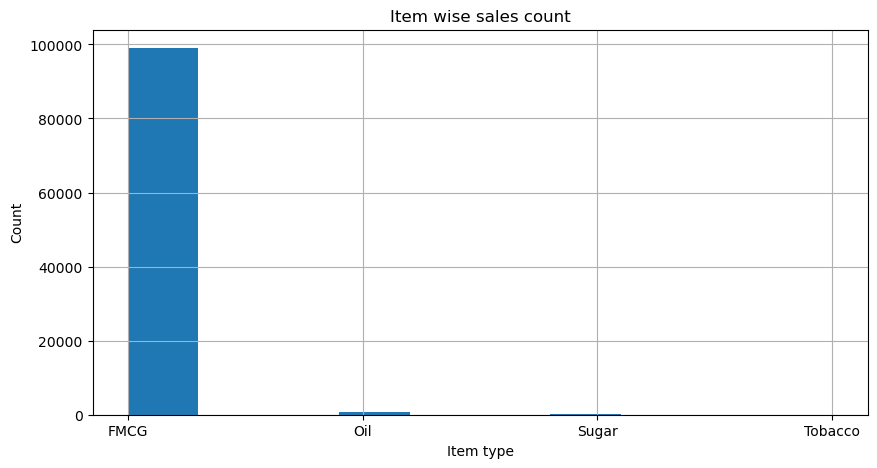

In [22]:
#States count
plt.figure(figsize = (10, 5) )
plt.hist(df['ItemType'])
plt.xlabel("Item type")
plt.ylabel("Count")
plt.title("Item wise sales count")
plt.grid(True)
plt.show()

### Maximum sold Item Type

Text(0.5, 1.0, 'Scatter plot of ItemType and Qty')

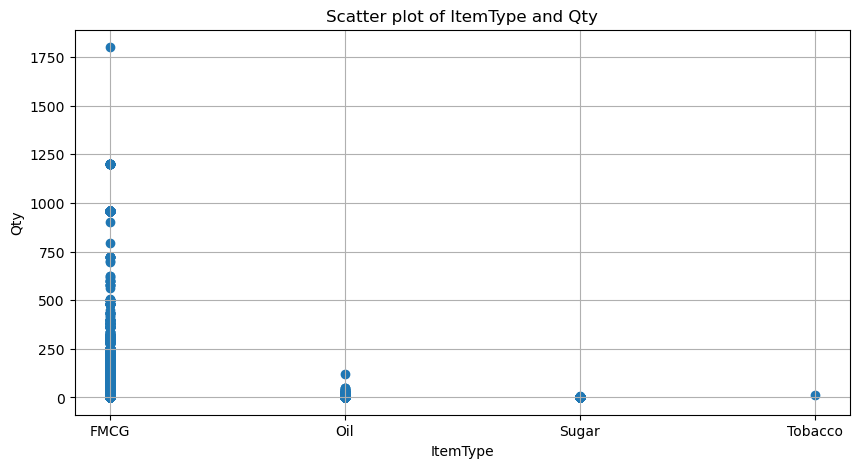

In [23]:
plt.figure(figsize = (10, 5) )
plt.scatter(df['ItemType'],df['Qty'])
plt.xlabel("ItemType")
plt.ylabel("Qty")
plt.grid()
plt.title("Scatter plot of ItemType and Qty")

### state wise NetAmount

In [24]:
dfg.groupby(['State'])['NetAmount'].sum().reset_index()

,State,NetAmount
0,Andhra Pradesh,8.888404e+05
1,Bihar,1.804538e+06
2,Jharkhand,1.591127e+06
3,Karnataka,2.441460e+06
4,Madhya Pradesh,1.142146e+06
5,Maharashtra,7.705581e+06
6,Telangana,1.831452e+06


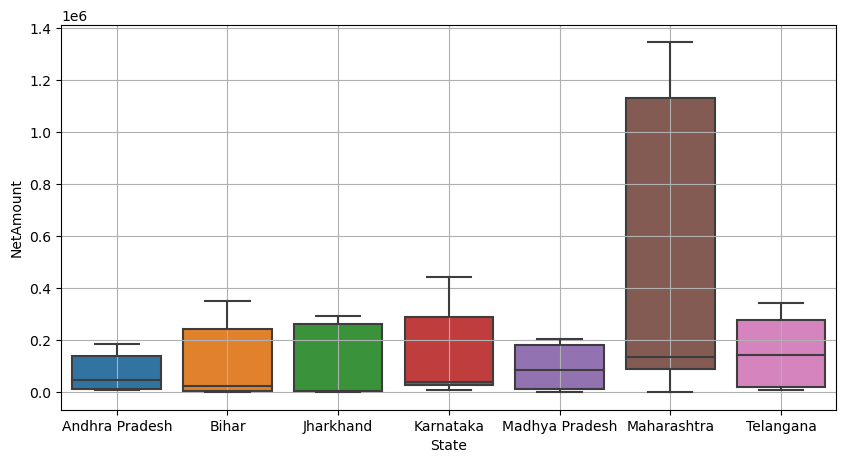

In [25]:
plt.figure(figsize = (10, 5) )
sns.boxplot(dfg['State'],dfg['NetAmount'])
plt.grid(True)

In [26]:
dfg.groupby(['ItemType'])['NetAmount'].sum().reset_index()

,ItemType,NetAmount
0,FMCG,1.594185e+07
1,Oil,9.860355e+05
2,Sugar,4.768076e+05
3,Tobacco,4.470000e+02


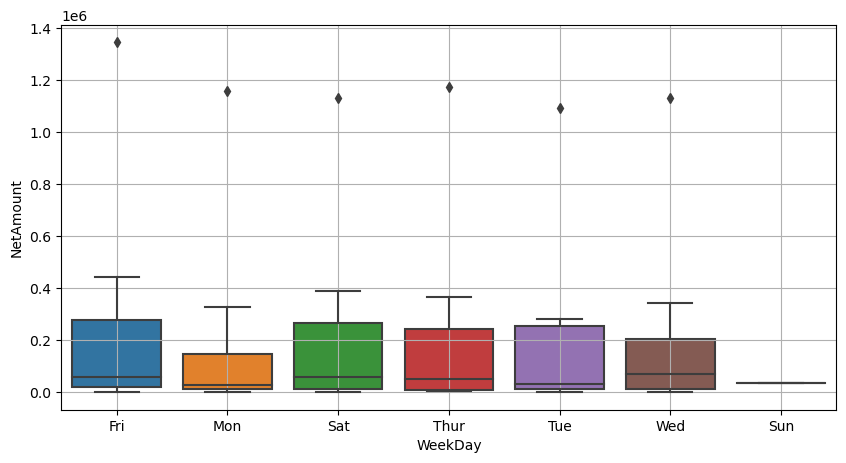

In [27]:
plt.figure(figsize = (10, 5) )
sns.boxplot(dfg['WeekDay'],dfg['NetAmount'])
plt.grid(True)

Text(0.5, 1.0, 'Scatter plot of avg_unitprice and Quantity')

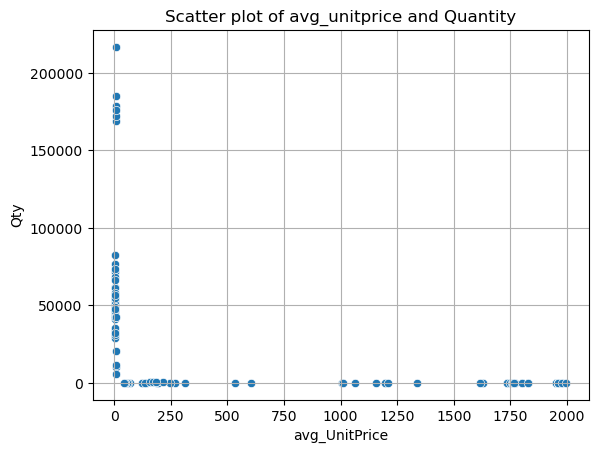

In [28]:
# graph quantity w.r.t unit price
#plt.figure(figsize = (10, 5) )
sns.scatterplot(dfg['avg_UnitPrice'],dfg['Qty'])
plt.grid(True)
plt.title("Scatter plot of avg_unitprice and Quantity")

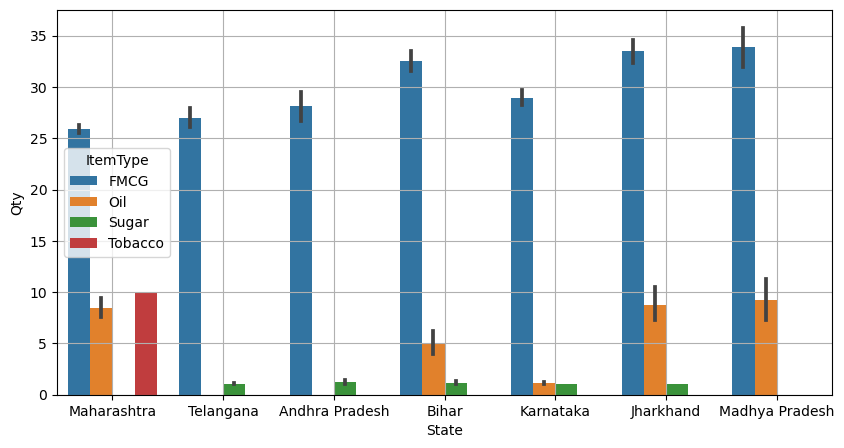

In [29]:
##   -- bar plot
plt.figure(figsize = (10, 5) )
sns.barplot(df['State'],df['Qty'],hue=df['ItemType'])
plt.grid(True)

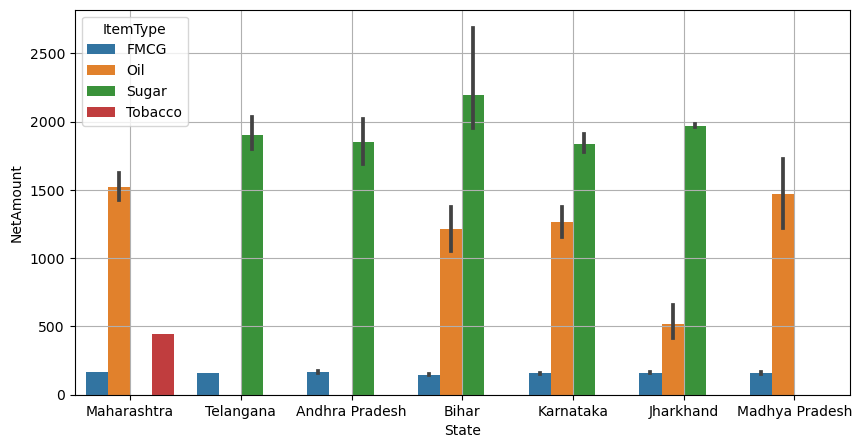

In [30]:
##   -- bar plot
plt.figure(figsize = (10, 5) )
sns.barplot(df['State'],df['NetAmount'],hue=df['ItemType'])
plt.grid(True)

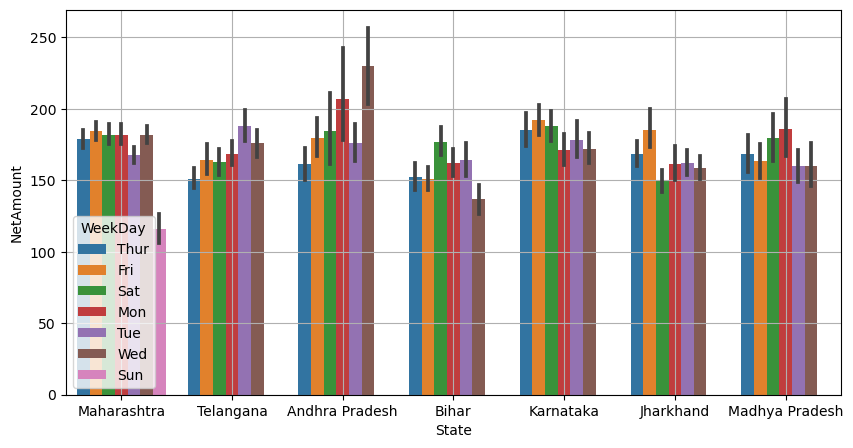

In [31]:
##   -- bar plot
plt.figure(figsize = (10, 5) )
sns.barplot(df['State'],df['NetAmount'],hue=df['WeekDay'])
plt.grid(True)

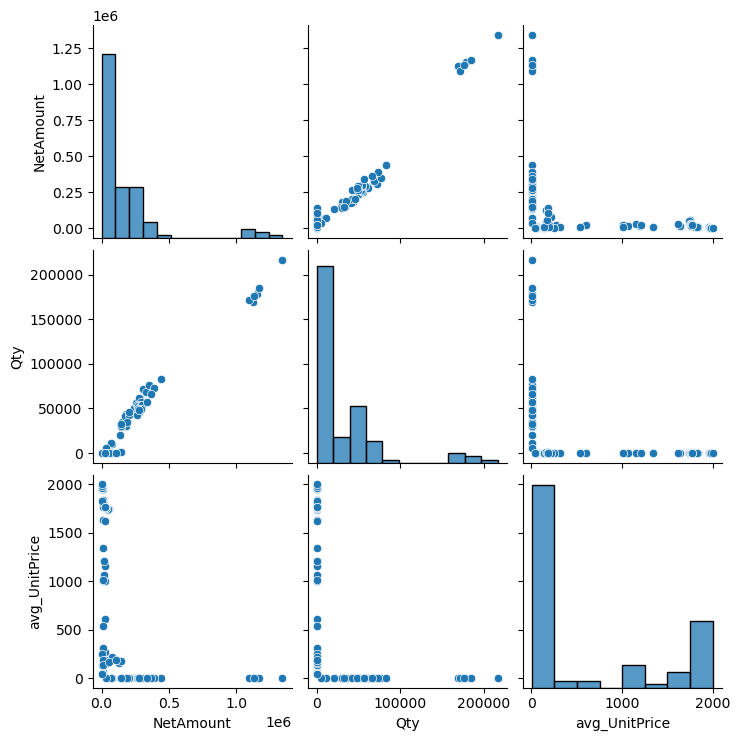

In [32]:
## pair plot
sns.pairplot(dfg)

# Step 4: Data Preparation

In [33]:
dfg.head()

,State,ItemType,WeekDay,NetAmount,Qty,avg_UnitPrice
0,Andhra Pradesh,FMCG,Fri,184445.598430,32203,5.727591
1,Andhra Pradesh,FMCG,Mon,75562.829859,10495,7.199889
2,Andhra Pradesh,FMCG,Sat,71064.563980,11301,6.288343
3,Andhra Pradesh,FMCG,Thur,180633.420052,30234,5.974513
4,Andhra Pradesh,FMCG,Tue,147372.533542,29202,5.046659


# Dummy Variables

In [34]:
sales=pd.get_dummies(dfg, columns=['State','ItemType','WeekDay'], drop_first=True)

In [35]:
sales.head()

,NetAmount,Qty,avg_UnitPrice,State_Bihar,State_Jharkhand,State_Karnataka,State_Madhya Pradesh,State_Maharashtra,State_Telangana,ItemType_Oil,ItemType_Sugar,ItemType_Tobacco,WeekDay_Mon,WeekDay_Sat,WeekDay_Sun,WeekDay_Thur,WeekDay_Tue,WeekDay_Wed
0,184445.598430,32203,5.727591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,75562.829859,10495,7.199889,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,71064.563980,11301,6.288343,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,180633.420052,30234,5.974513,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,147372.533542,29202,5.046659,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Step 5: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
sales_train, sales_test = train_test_split(sales, train_size = 0.8, test_size = 0.2, random_state = 100)
print(sales_train.shape)
print(sales_test.shape)

(81, 18)
(21, 18)


# Rescaling the Features

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
bscaler = MinMaxScaler()

In [39]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Qty','NetAmount','avg_UnitPrice']

sales_train[num_vars] = bscaler.fit_transform(sales_train[num_vars])

In [40]:
sales_train.head()

,NetAmount,Qty,avg_UnitPrice,State_Bihar,State_Jharkhand,State_Karnataka,State_Madhya Pradesh,State_Maharashtra,State_Telangana,ItemType_Oil,ItemType_Sugar,ItemType_Tobacco,WeekDay_Mon,WeekDay_Sat,WeekDay_Sun,WeekDay_Thur,WeekDay_Tue,WeekDay_Wed
84,0.088008,0.002961,0.090626,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
83,0.097190,0.003773,0.078266,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
43,0.004046,0.000009,0.982874,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
28,0.005477,0.000014,0.978092,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
22,0.017229,0.000175,0.301808,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


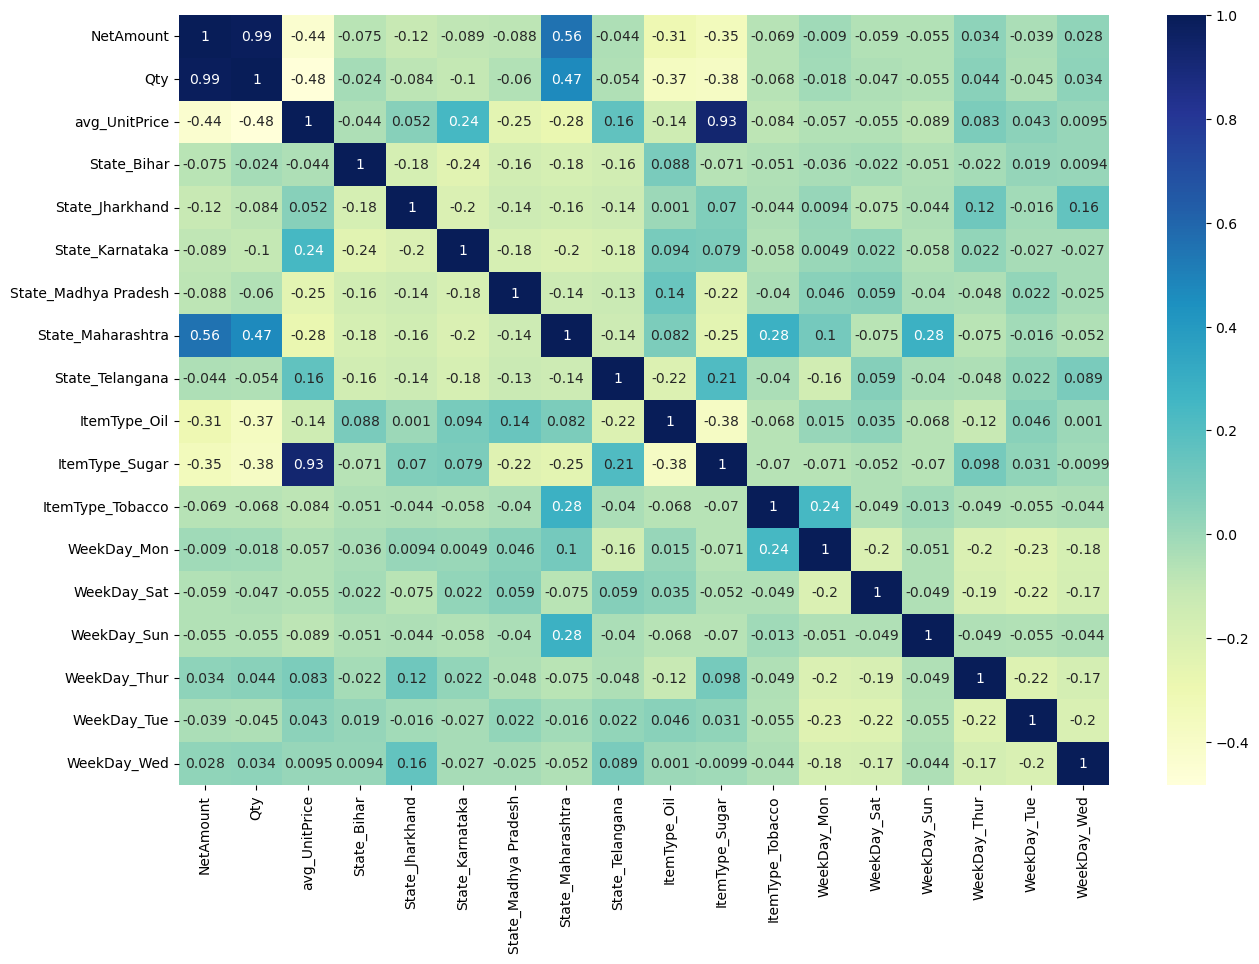

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(sales_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, 'Qty' seems to the correlated to 'NetAmount' the most. Let's see a pairplot for 'Qty' vs 'NetAmount'.

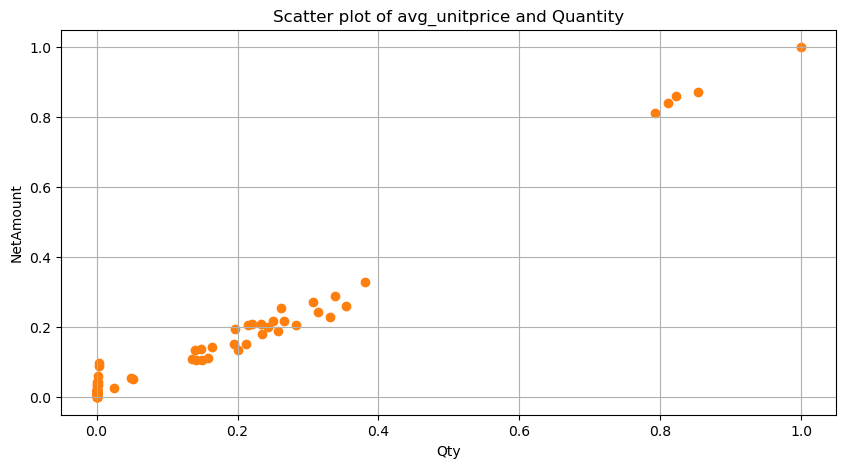

In [42]:
plt.figure(figsize=[10,5])
sns.scatterplot(sales_train.Qty, sales_train.NetAmount)
plt.grid(True)
plt.title("Scatter plot of avg_unitprice and Quantity")
plt.scatter(sales_train.Qty, sales_train.NetAmount)
plt.show()

As you might have noticed, 'State_Maharashtra' seems to the correlated to 'NetAmount' the most. Let's see a pairplot for 'State_Maharashtra' vs 'NetAmount'.

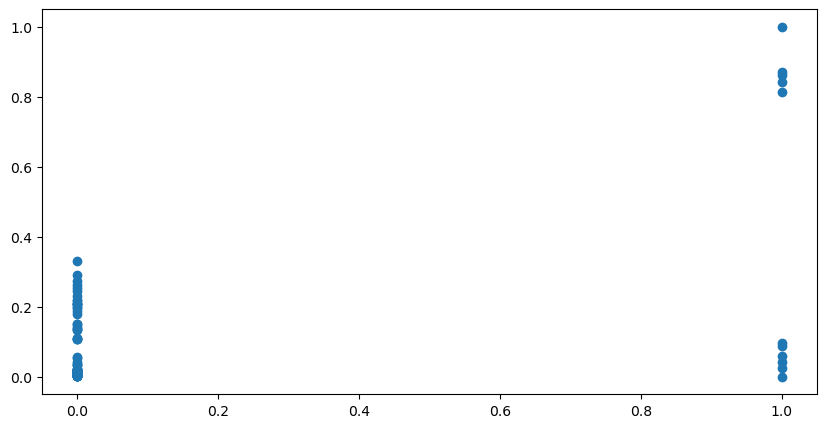

In [43]:
plt.figure(figsize=[10,5])
plt.scatter(sales_train.State_Maharashtra, sales_train.NetAmount)
plt.show()

So, we pick 'State_Maharashtra' as the first variable and we'll try to fit a regression line to that.

# Splitting X and Y sets for the model building

In [44]:
sales.head()

,NetAmount,Qty,avg_UnitPrice,State_Bihar,State_Jharkhand,State_Karnataka,State_Madhya Pradesh,State_Maharashtra,State_Telangana,ItemType_Oil,ItemType_Sugar,ItemType_Tobacco,WeekDay_Mon,WeekDay_Sat,WeekDay_Sun,WeekDay_Thur,WeekDay_Tue,WeekDay_Wed
0,184445.598430,32203,5.727591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,75562.829859,10495,7.199889,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,71064.563980,11301,6.288343,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,180633.420052,30234,5.974513,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,147372.533542,29202,5.046659,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [45]:
#sales.drop(['GrandTotal'],inplace=True,axis=1)

In [46]:
y_train = sales_train.pop('NetAmount')
X_train = sales_train

In [47]:
y_train.head()

84    0.088008
83    0.097190
43    0.004046
28    0.005477
22    0.017229
Name: NetAmount, dtype: float64

In [48]:
X_train.head()

,Qty,avg_UnitPrice,State_Bihar,State_Jharkhand,State_Karnataka,State_Madhya Pradesh,State_Maharashtra,State_Telangana,ItemType_Oil,ItemType_Sugar,ItemType_Tobacco,WeekDay_Mon,WeekDay_Sat,WeekDay_Sun,WeekDay_Thur,WeekDay_Tue,WeekDay_Wed
84,0.002961,0.090626,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
83,0.003773,0.078266,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
43,0.000009,0.982874,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
28,0.000014,0.978092,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
22,0.000175,0.301808,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


# Step 6: Building a linear model

In [49]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['Qty']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [50]:
# Check the parameters obtained

lr.params

const    0.003352
Qty      0.954922
dtype: float64

In [51]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              NetAmount   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3027.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           9.31e-65
Time:                        05:44:21   Log-Likelihood:                 159.47
No. Observations:                  81   AIC:                            -314.9
Df Residuals:                      79   BIC:                            -310.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.004      0.754      0.4

In [52]:
# Assign all the feature variables to X
X_train_lm = X_train[['Qty','State_Maharashtra']]

In [53]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                0.000540
Qty                  0.900936
State_Maharashtra    0.073467
dtype: float64

In [54]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              NetAmount   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2663.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.64e-72
Time:                        05:44:21   Log-Likelihood:                 182.41
No. Observations:                  81   AIC:                            -358.8
Df Residuals:                      78   BIC:                            -351.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0005      0.00

In [55]:
# Assign all the feature variables to X
X_train_lm = X_train[['Qty','State_Maharashtra','WeekDay_Wed']]

In [56]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                0.000366
Qty                  0.900780
State_Maharashtra    0.073582
WeekDay_Wed          0.001320
dtype: float64

In [57]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              NetAmount   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1753.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           9.47e-71
Time:                        05:44:21   Log-Likelihood:                 182.42
No. Observations:                  81   AIC:                            -356.8
Df Residuals:                      77   BIC:                            -347.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.00

## Adding all the variables to the model

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,avg_UnitPrice,24.74
9,ItemType_Sugar,22.61
6,State_Maharashtra,5.33
8,ItemType_Oil,5.10
0,Qty,4.99
4,State_Karnataka,3.14
2,State_Bihar,2.46
3,State_Jharkhand,2.23
5,State_Madhya Pradesh,1.93
15,WeekDay_Tue,1.81


## Adding all the variables to the model

In [60]:
X_train_lm = X_train[[ 'Qty', 'avg_UnitPrice', 'State_Bihar', 'State_Jharkhand',
       'State_Karnataka', 'State_Madhya Pradesh', 'State_Maharashtra',
       'State_Telangana', 'ItemType_Oil', 'ItemType_Sugar', 'ItemType_Tobacco',
       'WeekDay_Mon', 'WeekDay_Sat', 'WeekDay_Sun', 'WeekDay_Thur',
       'WeekDay_Tue', 'WeekDay_Wed']]

In [61]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                  -0.018072
Qty                     0.970980
avg_UnitPrice          -0.004900
State_Bihar            -0.029748
State_Jharkhand        -0.026038
State_Karnataka        -0.004988
State_Madhya Pradesh   -0.018483
State_Maharashtra       0.053172
State_Telangana         0.003096
ItemType_Oil            0.045882
ItemType_Sugar          0.044017
ItemType_Tobacco       -0.040376
WeekDay_Mon             0.005335
WeekDay_Sat            -0.003333
WeekDay_Sun            -0.032826
WeekDay_Thur            0.000847
WeekDay_Tue             0.000596
WeekDay_Wed             0.002565
dtype: float64

In [62]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              NetAmount   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     772.2
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.36e-66
Time:                        05:44:22   Log-Likelihood:                 227.20
No. Observations:                  81   AIC:                            -418.4
Df Residuals:                      63   BIC:                            -375.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0181 

In [63]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = sales.columns
vif['VIF'] = [variance_inflation_factor(sales.values, i) for i in range(sales.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,NetAmount,258.52
1,Qty,251.99
2,avg_UnitPrice,25.67
10,ItemType_Sugar,24.80
9,ItemType_Oil,6.97
7,State_Maharashtra,6.71
3,State_Bihar,3.44
4,State_Jharkhand,3.21
5,State_Karnataka,2.99
6,State_Madhya Pradesh,2.40


# Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:
y_train_NetAmount = lr_1.predict(X_train_lm)

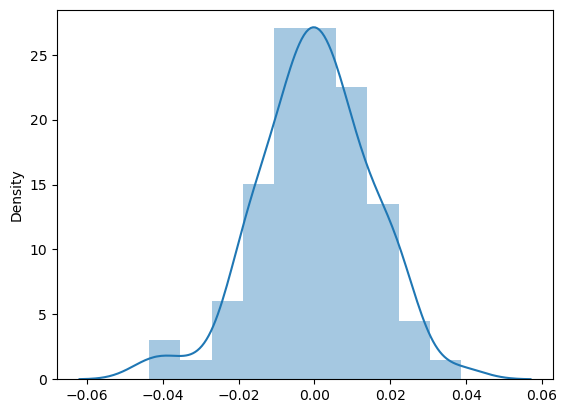

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train - y_train_NetAmount)
plt.show()

# Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

### Applying the scaling on the test sets

In [66]:
num_vars =['Qty','NetAmount','avg_UnitPrice']

sales_test[num_vars] = bscaler.transform(sales_test[num_vars])

In [67]:
sales_test.describe()

,NetAmount,Qty,avg_UnitPrice,State_Bihar,State_Jharkhand,State_Karnataka,State_Madhya Pradesh,State_Maharashtra,State_Telangana,ItemType_Oil,ItemType_Sugar,ItemType_Tobacco,WeekDay_Mon,WeekDay_Sat,WeekDay_Sun,WeekDay_Thur,WeekDay_Tue,WeekDay_Wed
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.0,21.000000,21.000000,21.000000
mean,0.113133,0.110006,0.245936,0.142857,0.285714,0.047619,0.142857,0.142857,0.142857,0.380952,0.238095,0.0,0.190476,0.142857,0.0,0.190476,0.047619,0.238095
std,0.187382,0.188160,0.392812,0.358569,0.462910,0.218218,0.358569,0.358569,0.358569,0.497613,0.436436,0.0,0.402374,0.358569,0.0,0.402374,0.218218,0.436436
min,0.001120,0.000000,0.000079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.005144,0.000074,0.000892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.020129,0.000535,0.034008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.194935,0.225719,0.122667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,0.839276,0.780370,0.982874,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [68]:
y_test = sales_test.pop('NetAmount')
X_test = sales_test

In [69]:
y_test.head()

37    0.005144
86    0.104698
26    0.001120
93    0.200391
35    0.005284
Name: NetAmount, dtype: float64

In [70]:
X_test.head()

,Qty,avg_UnitPrice,State_Bihar,State_Jharkhand,State_Karnataka,State_Madhya Pradesh,State_Maharashtra,State_Telangana,ItemType_Oil,ItemType_Sugar,ItemType_Tobacco,WeekDay_Mon,WeekDay_Sat,WeekDay_Sun,WeekDay_Thur,WeekDay_Tue,WeekDay_Wed
37,0.000535,0.029492,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
86,0.003602,0.088549,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
26,0.000000,0.978092,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
93,0.225719,0.000673,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
35,0.000480,0.034008,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [71]:
X_test.shape

(21, 17)

In [72]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [73]:
# Making predictions using the fourth model

y_pred_m4 = lr_1.predict(X_test_m4)

# Step 9: Model Evaluation¶

In [74]:
from sklearn.metrics import r2_score

r2_score(y_true = y_test,y_pred=y_pred_m4)

0.9929732424447406

### We can see that the equation of our best fitted line is:

  NetAmount= -0.018 + Qty*0.971 + State_Maharashtra*0.053 +ItemType_oil*0.046+ItemType_sugar*0.044+ WeekDay_Wed*0.003 + WeekDay_Thur*0.001_WeekDay_Tue*0.001